# <span style='color:Blue'> The aim of this task is to load metadata file in an interactive way and to analyze weather influence on electricity consumption  </span>
Dataset from: https://www.kaggle.com/claytonmiller/building-data-genome-project-v1

In [1]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
metadata=pd.read_csv("meta_open.csv")

In [3]:
metadata.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.0,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.0,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.0,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.0,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.0,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv


In [6]:
Timezone_data={'America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Europe/Zurich','Asia/Singapore','America/Denver'}
Industry_data={'Education','Government','Commercial Property'}

In [7]:
while True :
    Timezone=str(input("please enter Time zone "))
    if Timezone not in Timezone_data:   
        print("\nInvalid answer\n")
        continue
    else:
            break

please enter Time zone America/Chicago


In [8]:
while True :
    Industry=str(input("please enter Industry name "))
    if Industry not in Industry_data:   
        print("\nInvalid answer\n")
        continue
    else:
            break               

please enter Industry name Education


In [9]:
filtered_metadata = metadata.loc[(metadata['timezone']==Timezone)&(metadata['industry']==Industry)]
filtered_metadata[['uid','nickname','newweatherfilename']]

,uid,nickname,newweatherfilename
90,Office_Mada,Mada,weather3.csv
91,Office_Madeleine,Madeleine,weather3.csv
92,Office_Madisyn,Madisyn,weather3.csv
93,Office_Malik,Malik,weather3.csv
94,Office_Marc,Marc,weather3.csv
...,...,...,...
484,UnivLab_Marie,Marie,weather3.csv
485,UnivLab_Mario,Mario,weather3.csv
486,UnivLab_Marshall,Marshall,weather3.csv
487,UnivLab_Miles,Miles,weather3.csv


In [10]:
filtered_metadata.uid

90          Office_Mada
91     Office_Madeleine
92       Office_Madisyn
93         Office_Malik
94          Office_Marc
             ...       
484       UnivLab_Marie
485       UnivLab_Mario
486    UnivLab_Marshall
487       UnivLab_Miles
488        UnivLab_Neil
Name: uid, Length: 75, dtype: object

In [15]:
# let us go for univDorm_April 

building_file=filtered_metadata['uid'].values[0]+'.csv' # choose the first building

building_data=pd.read_csv("{}".format(building_file)) # let us load the filtered office file 

weather_file=filtered_metadata['newweatherfilename'].values[0]
weather_data=pd.read_csv("{}".format(weather_file))  # let us load the weather file 

In [16]:
# Visual assesment 
#let us visually asses the office file for quality and tidy issues 
building_data.head()



,timestamp,Office_Mada
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [17]:
#check for timestamp column type 
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8760 non-null   object 
 1   Office_Mada  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [18]:
#it seems that the timestamp type isnot of a date type & Also the Kilowatt column isn't named properly 
building_data['timestamp']=pd.to_datetime(building_data['timestamp']) # convert to datetime
building_data.columns=['timestamp','Kilowatt'] #rename columns 

In [19]:
building_data.info()#test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  8760 non-null   datetime64[ns]
 1   Kilowatt   8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [21]:
# let us visually asses the weather data file for quality & tidness issues 
weather_data.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


Quality issues 
<br>
1)Timestamp type shall be changed to datetime 
<br>
2)There are unwanted columns that shall be dropped as we are interested only in temperature , humidity and time 

Tidy issues : 
<br>
1) The two datasets shall be merged in one set. 


In [24]:
weather_data['timestamp']=pd.to_datetime(weather_data['timestamp']) # convert to datetime

In [25]:
weather_data=weather_data[['timestamp','TemperatureC','Humidity']] #use only needed columns 

In [27]:
weather_data.info() # Test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810 entries, 0 to 10809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     10810 non-null  datetime64[ns]
 1   TemperatureC  10810 non-null  float64       
 2   Humidity      10809 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 253.5 KB


In [28]:
#Resample the data , it is essential to resample the data before merging the two data frames

weather_data=weather_data.set_index('timestamp') # set the time stamp column as the index. 


In [29]:
weather_data=weather_data.resample('H').mean()   # resample the data hourly 

In [30]:
weather_data.info() #test

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Freq: H
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TemperatureC  8721 non-null   float64
 1   Humidity      8721 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


In [31]:
building_data=building_data.set_index('timestamp') # set the time stamp column as the index. 


In [32]:
building_data=building_data.resample('H').mean() # resample the data hourly 

In [33]:
building_data.info()  # test

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kilowatt  8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [34]:
#concat the two datasets in one dataframe 

In [76]:
building_data_clean=pd.merge(building_data,weather_data,how='left',on='timestamp') # Merge data
building_data_clean.tail() #test

,Kilowatt,TemperatureC,Humidity
timestamp,,,
2015-04-30 19:00:00,79.50,17.8,24.0
2015-04-30 20:00:00,57.50,16.1,26.0
2015-04-30 21:00:00,52.25,13.9,32.0
2015-04-30 22:00:00,47.25,12.8,35.0
2015-04-30 23:00:00,41.25,13.9,34.0


# Section two : 

## Data visualization 

We will visualize the data in year 2014 

In [60]:
building_data_2014=building_data_clean.truncate(before='2014-01-01',after='2014-12-31') # Truncate the dataset
building_data_2014  #test

,Kilowatt,TemperatureC,Humidity
timestamp,,,
2014-05-01 00:00:00,46.50,3.90,100.0
2014-05-01 01:00:00,43.50,4.15,96.5
2014-05-01 02:00:00,45.00,3.90,100.0
2014-05-01 03:00:00,45.75,3.60,96.5
2014-05-01 04:00:00,45.25,3.30,97.0
...,...,...,...
2014-12-30 20:00:00,64.75,-19.40,72.0
2014-12-30 21:00:00,59.75,-19.40,72.0
2014-12-30 22:00:00,59.00,-21.10,79.0


In [61]:
building_data_monthly_2014=building_data_2014.resample('M').mean() #Resample the data monthly 

In [62]:
building_data_monthly_2014.Humidity

timestamp
2014-05-31    62.138105
2014-06-30    69.722563
2014-07-31    63.504996
2014-08-31    71.470296
2014-09-30    68.505556
2014-10-31    66.044448
2014-11-30    72.534640
2014-12-31    80.032178
Freq: M, Name: Humidity, dtype: float64

In [63]:
#Talk about humidity effect ...etc

In [69]:
def Humidity_rank(x):
    if x<50:
        return "Low"
    elif 50<x<65:
        return "Average"
    elif x>65:
        return "High"
    
    

In [70]:
building_data_monthly_2014['Humidity_rank'] = building_data_monthly_2014.Humidity.apply(lambda x: Humidity_rank(x))

In [71]:
building_data_monthly_2014.head()

,Kilowatt,TemperatureC,Humidity,Humidity_rank
timestamp,,,,
2014-05-31,68.136761,14.953629,62.138105,Average
2014-06-30,71.557292,20.747565,69.722563,High
2014-07-31,74.298051,22.042751,63.504996,Average
2014-08-31,72.184812,22.641517,71.470296,High
2014-09-30,73.343403,16.762269,68.505556,High


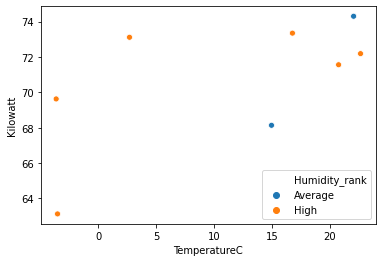

In [73]:
sns.scatterplot(data=building_data_monthly_2014,x="TemperatureC",y="Kilowatt",hue="Humidity_rank")

## In temperature range between 20 and 30 degrees we notice that at approximately equal temperatures, the energy consumption increases as the humidity increases. 